In [1]:
import json
from knnredo import get_top_similar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ruta='pisos_limpios.csv'
df = pd.read_csv(ruta,sep=',')
df.set_index('uv', inplace=True)
df=df[df.precio>0]
df.precio_area=df.precio_area=/10**9
with open('./perfiles/perfil1.json') as archivo:
            opciones = json.load(archivo)

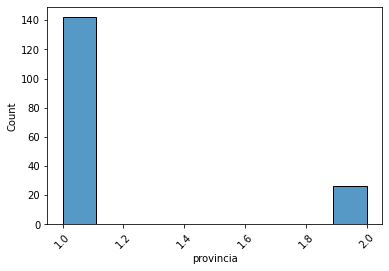

In [3]:
g= sns.histplot(df.provincia);
plt.xticks(rotation=45);

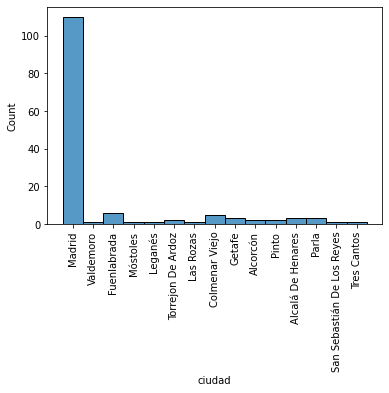

In [4]:
g= sns.histplot(df.ciudad[df.provincia==1]);
plt.xticks(rotation=90);

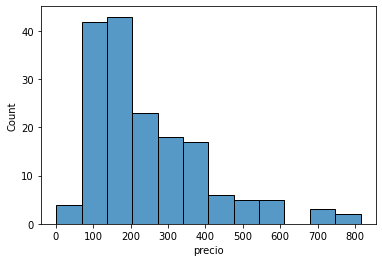

In [5]:
sns.histplot(df.precio);

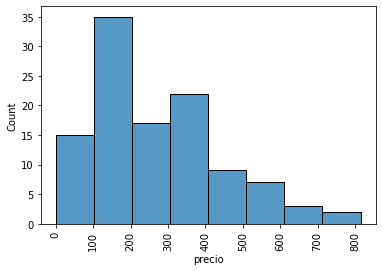

In [6]:
g= sns.histplot(df.precio[df.ciudad =='Madrid']);
plt.xticks(rotation=90);

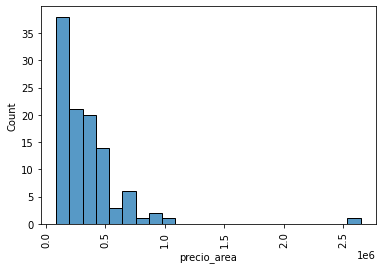

In [7]:
g= sns.histplot(df.precio_area[df.ciudad =='Madrid']);
plt.xticks(rotation=90);

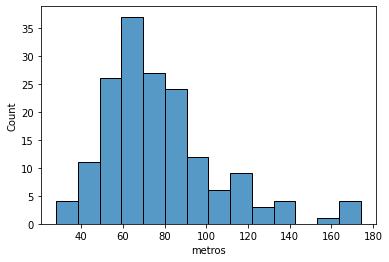

In [8]:
sns.histplot(df.metros);

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


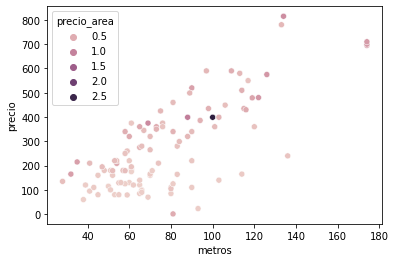

In [9]:
###################################################################
#Nos quedamoscon Madrid
###################################################################
df = df[df.ciudad =='Madrid']
sns.scatterplot(df[df.provincia ==1].metros, df[df.provincia ==1].precio,hue=(df[df.provincia ==1].precio_area));

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


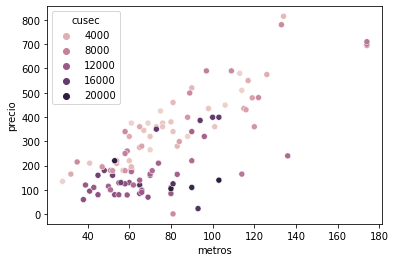

In [10]:
sns.scatterplot(df[df.ciudad=='Madrid'].metros, df[df.ciudad=='Madrid'].precio,hue=df[df.ciudad=='Madrid'].cusec);

/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


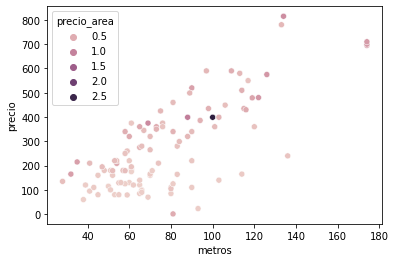

In [11]:
sns.scatterplot(df.metros, df.precio, hue=df.precio_area);

In [12]:
columnas = ['planta','ascensor','habitaciones','precio', "precio_area"]
n_targets = 3
k = 5

dfs=[]
#comentario
for i in range(n_targets):
    #target =df.iloc[]
    target = df.sample(1)
    df_test = df.copy()
    df_test.drop(target.index, axis=0, inplace=True)
    # target = df.loc[inds[i]]
    # get top similar
    similar_df = get_top_similar(df_test,target, opciones, k)

    # etiquetar target
    target['is_target'] = 1
    similar_df['is_target'] = 0
        
    # contains 4 houses with 3 cols: columns and is_target
    df_all = pd.concat([target, similar_df])[list(target.columns)]
    # give color
    df_all['group'] = i

    dfs.append(df_all)

df_groups = pd.concat(dfs)

In [13]:
def row_style(row):
    if row.is_target == 1:
        return pd.Series('background-color: green', row.index)
    else:
        return pd.Series('', row.index)



In [14]:
df_groups=df_groups[columnas + ['is_target'] + ['group']]
#df_groups =df_groups.style.apply(row_style, axis=1)
df_groups

,planta,ascensor,habitaciones,precio,precio_area,is_target,group
uv,,,,,,,
UV/2020/000305,0,1,3,220.0,216543.750000,1,0
UV/2020/000325,4,1,3,110.0,137340.000000,0,0
UV/2021/000381,4,0,3,99.9,168682.857143,0,0
UV/2020/000189,3,1,3,460.0,341900.000000,0,0
UV/2020/000113,5,1,3,520.0,630000.000000,1,1
UV/2020/000150,5,1,3,575.0,750625.000000,0,1
UV/2020/000189,3,1,3,460.0,341900.000000,0,1
UV/2020/000324,5,1,3,550.0,253818.181818,0,1
UV/2021/000357,5,1,2,220.0,179200.000000,1,2


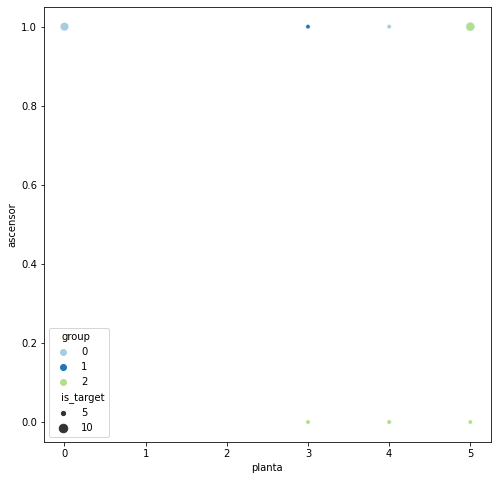

In [15]:
colores=['r','g','y','b','c']
fig=plt.gcf()
fig.set_size_inches(8,8)
#sns.set_palette("Paired")

def jitter(values):
    return values * np.random.normal(1,0,values.shape)

sns.scatterplot(x=jitter(df_groups[columnas[0]]), y=jitter(df_groups[columnas[1]]), size=5+5*df_groups.is_target, hue=df_groups.group, palette='Paired');



<AxesSubplot:xlabel='habitaciones', ylabel='precio'>

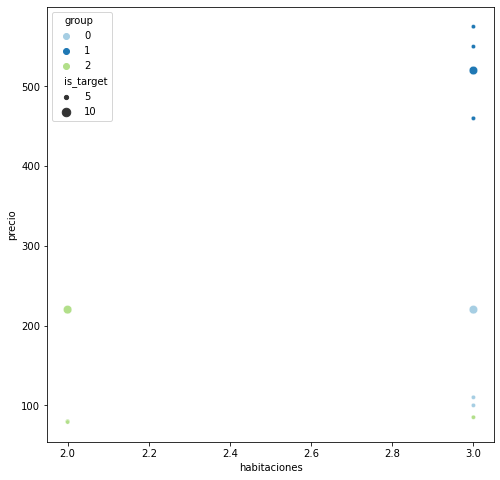

In [16]:
fig=plt.gcf()
fig.set_size_inches(8,8)
sns.scatterplot(x=jitter(df_groups[columnas[2]]), y=jitter(df_groups[columnas[3]]), size=5+5*df_groups.is_target, hue=df_groups.group, palette='Paired')



/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/emilio/anaconda3/envs/clik/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


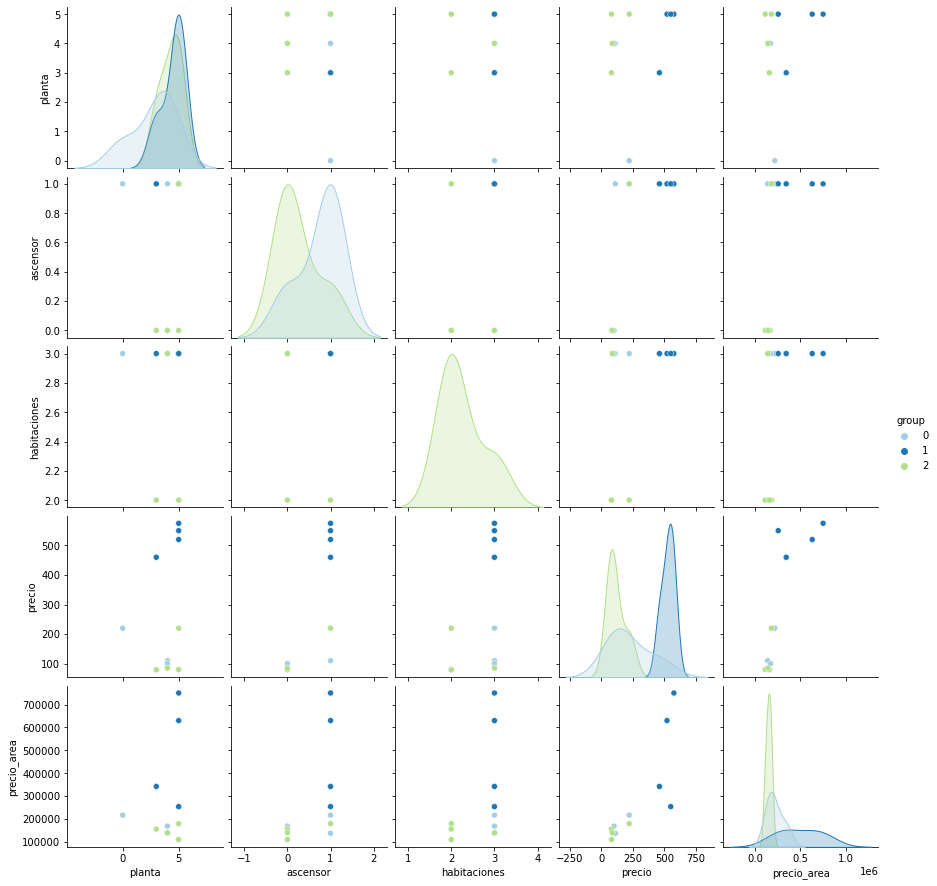

In [17]:
sns.pairplot(df_groups[columnas + ["group"]], hue="group", palette='Paired');